In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import re
import numpy as np

# Load In Star Wars Survey

In [2]:
survey = pd.read_csv('starwars.csv', encoding = 'ISO-8859-1')

# Explore Dataset

In [3]:
"""
After exploring the columns I noticed that the first row contains information about the data 
in the columns, so I'll replace the column headers with more appropriate names and create a dictionary
with the metadata
"""
metadata = dict()
for index in range(len(survey.columns)):
    column = survey.columns[index]
    metadata[f'column {index}'] = {column:survey.iloc[0,index]}

In [4]:
# Now we can drop the first row and use the metadata dictioary to pick better column header names
survey.drop(index = 0, inplace = True)

# Observations
<br><br>
1. For columns 3 to 8 there is only one entry, which is the movie name; it is filled out if the            responder has watched the movie and is null otherwise
<br><br>
2. For columns 9 to 14 there are entries of 1 to 6, indicating the order of preference for the movies
   contained in the column 3 to 8. So for example in column 9 if there is a score of 6 then that means
   that the movie in column 3 was the respondents least favorite movie.
<br><br>   
To make the dataframe more clear, columns 3 to 8 will have binary values of True and False, and their headers modified; columns 9 to 14 will have their headers changed to reflect the episode that's being 
scored as well as changing their dtype to float. It is assumed in columns 3 to 8 that if no entry is made then it is considered False.

In [5]:
pattern = r'Episode [IV]+' # pattern to be extracted from columns 3 to 8

# iterate through columns and change headers, the variable replace will be used to replace the 
#  column headers

replace = list(survey.columns)
for index in range(9,15): # modify column 9 to 14 headers
    name = survey[replace[index - 6]].value_counts().index[0]
    name = re.findall(pattern,name)[0]
    replace[index] = 'Rank ' + name
    survey.iloc[:,index] = survey.iloc[:,index].astype('float64')

for index in range(3,9): # modify column 3 to 8 headers
    name = survey[replace[index]].value_counts().index[0]
    survey.iloc[:,index] = survey.iloc[:,index].apply(lambda x: True if x == name else False)
    name = re.findall(pattern,name)[0]
    name = 'Watched ' + name
    replace[index] = name
        

# Observations
<br><br>
- columns 15 to 28 contains responses concerning the perception of various characters in the star wars
  movies, but currently the columns names don't reflaect that.
  <br><br>
- The rest of the columns that have questions as column headers need to be renamed to be more practical
  and informative for analysis.
  
  Next we will rename the columns in 15 to 28 using the information we have in the metadata

In [6]:
for index in range(15,29):
    name = list(metadata[f'column {index}'].values())[0]
    replace[index] = name

# Observation
<br><br>
- Columns 2 and 3 contain values of 'Yes', 'No', and 'NaN'. They'll be changed to True
  and False, the assumption will be made that if 'Yes' wasn't filled then it is False
  <br><br>
- All the remaining columns in dataframe with questions as headers need to be changed to more             appropriate names.

In [7]:
# Change names of columns
change_dict = {1: 'Seen Any', 2: 'Star Wars Fan', 29: 'Who Shot', 30: 'Knows Expanded Universe', \
               31: 'Expanded Universe Fan', 32: 'Star Trek Fan', 37 : 'Location'}
for index in change_dict:
    replace[index] = change_dict[index]

survey.columns = replace

# update metadata to more easily determine column position
for index in range(len(survey.columns)):
    column = survey.columns[index]
    metadata[f'column {index}'] = column

In [8]:
for index in range(1,3):
    survey.iloc[:,index] = survey.iloc[:,index].apply(lambda x: True if x == name else False)

# Plot mean of movie rank columns

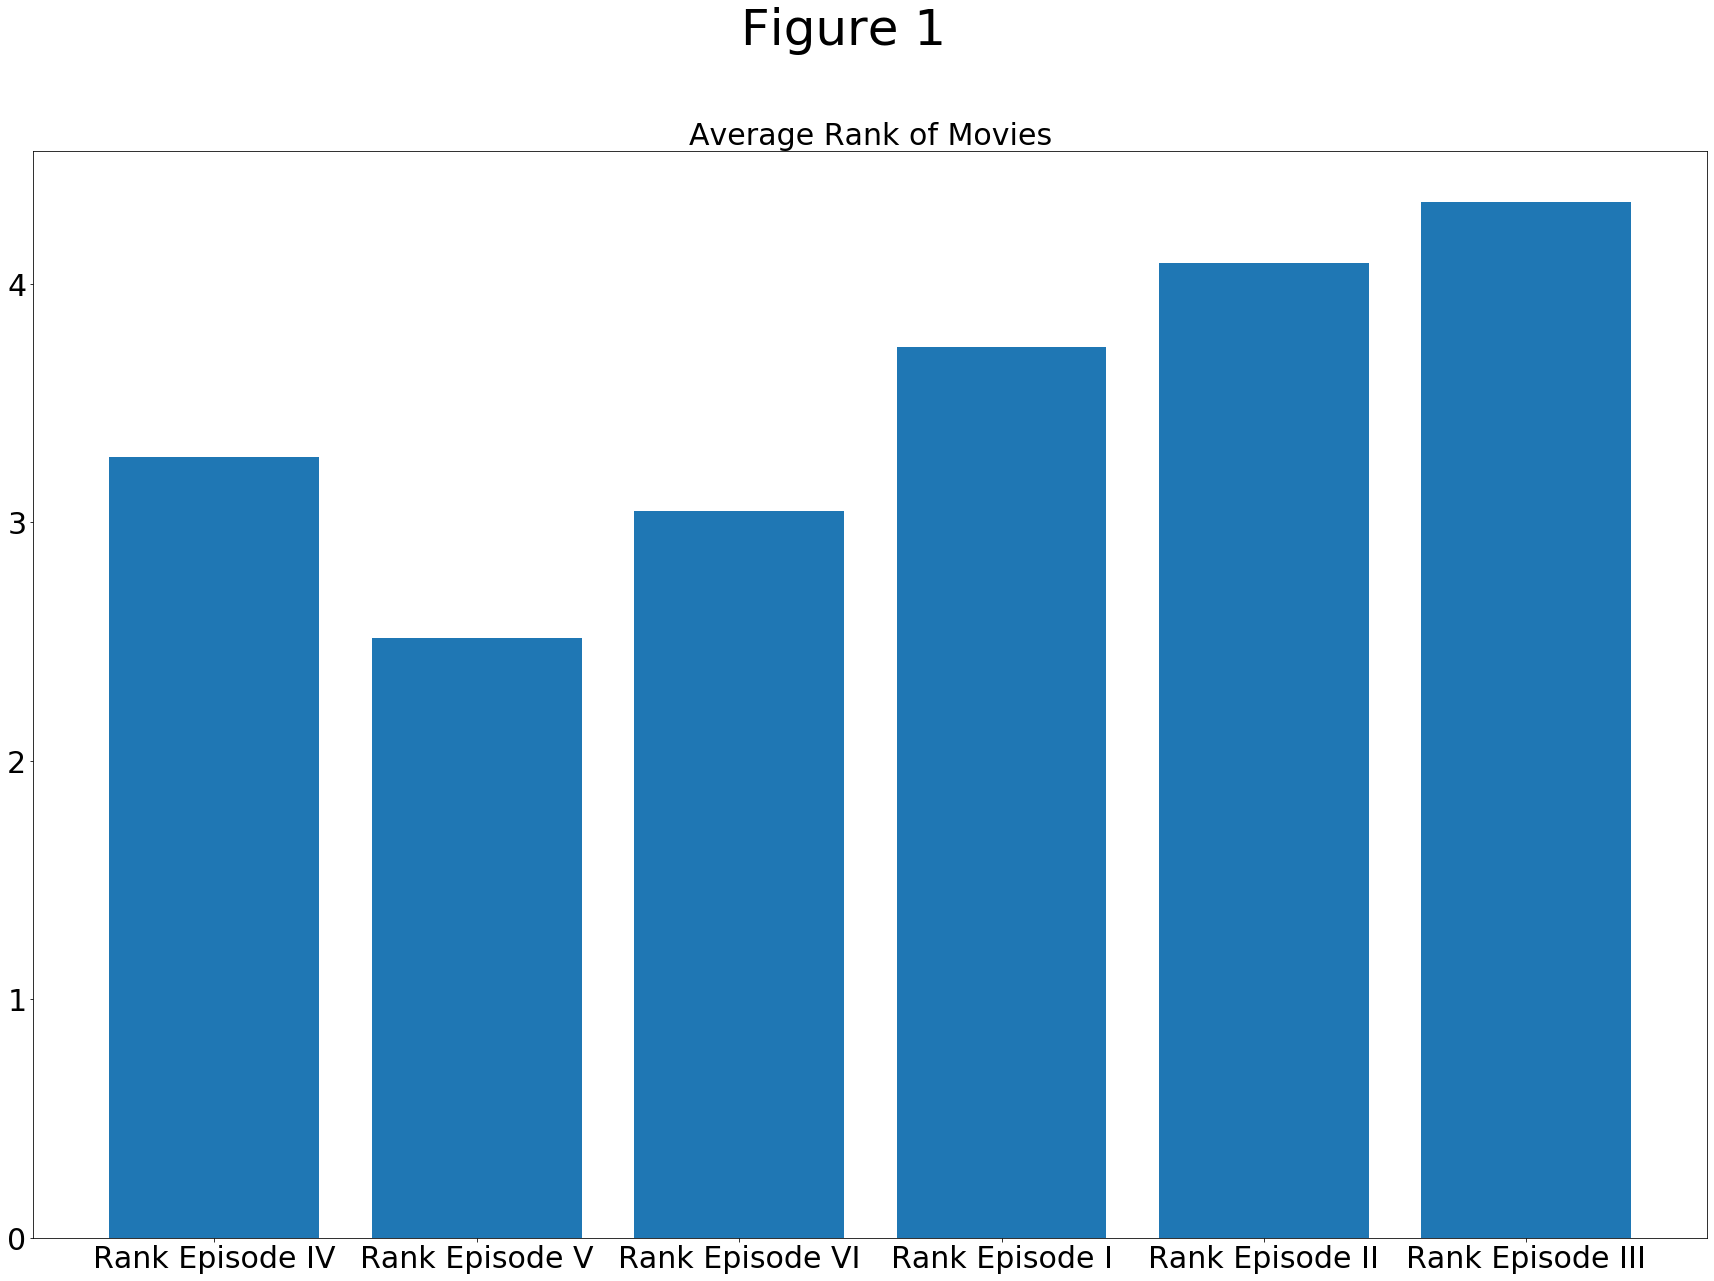

In [9]:
%matplotlib inline
rank_data = survey[[survey.columns[index] for index in [12,13,14,9,10,11]]].mean()
bar_position = np.arange(len(rank_data)) + 0.75
fig,ax = plt.subplots(figsize = (30,20))
ax.bar(bar_position,rank_data)
ax.set_title('Average Rank of Movies', size = 30)
ax.set_xticks(bar_position)
ax.set_xticklabels(rank_data.index)
for tick in (ax.xaxis.get_major_ticks() + ax.yaxis.get_major_ticks()):
    tick.label.set_fontsize(30)
fig.suptitle('Figure 1', fontsize = 50, y = 0.98 )
plt.show()

# Observations
<br><br>

- From the above barchart it can be seen that on average the first three star wars movies
  have lower average ranks than the last three, this could be attributed to the fact that the first       three and last three were bunched together in seperate time spans with a host of changes inbetween.


# Plot watching frequencies

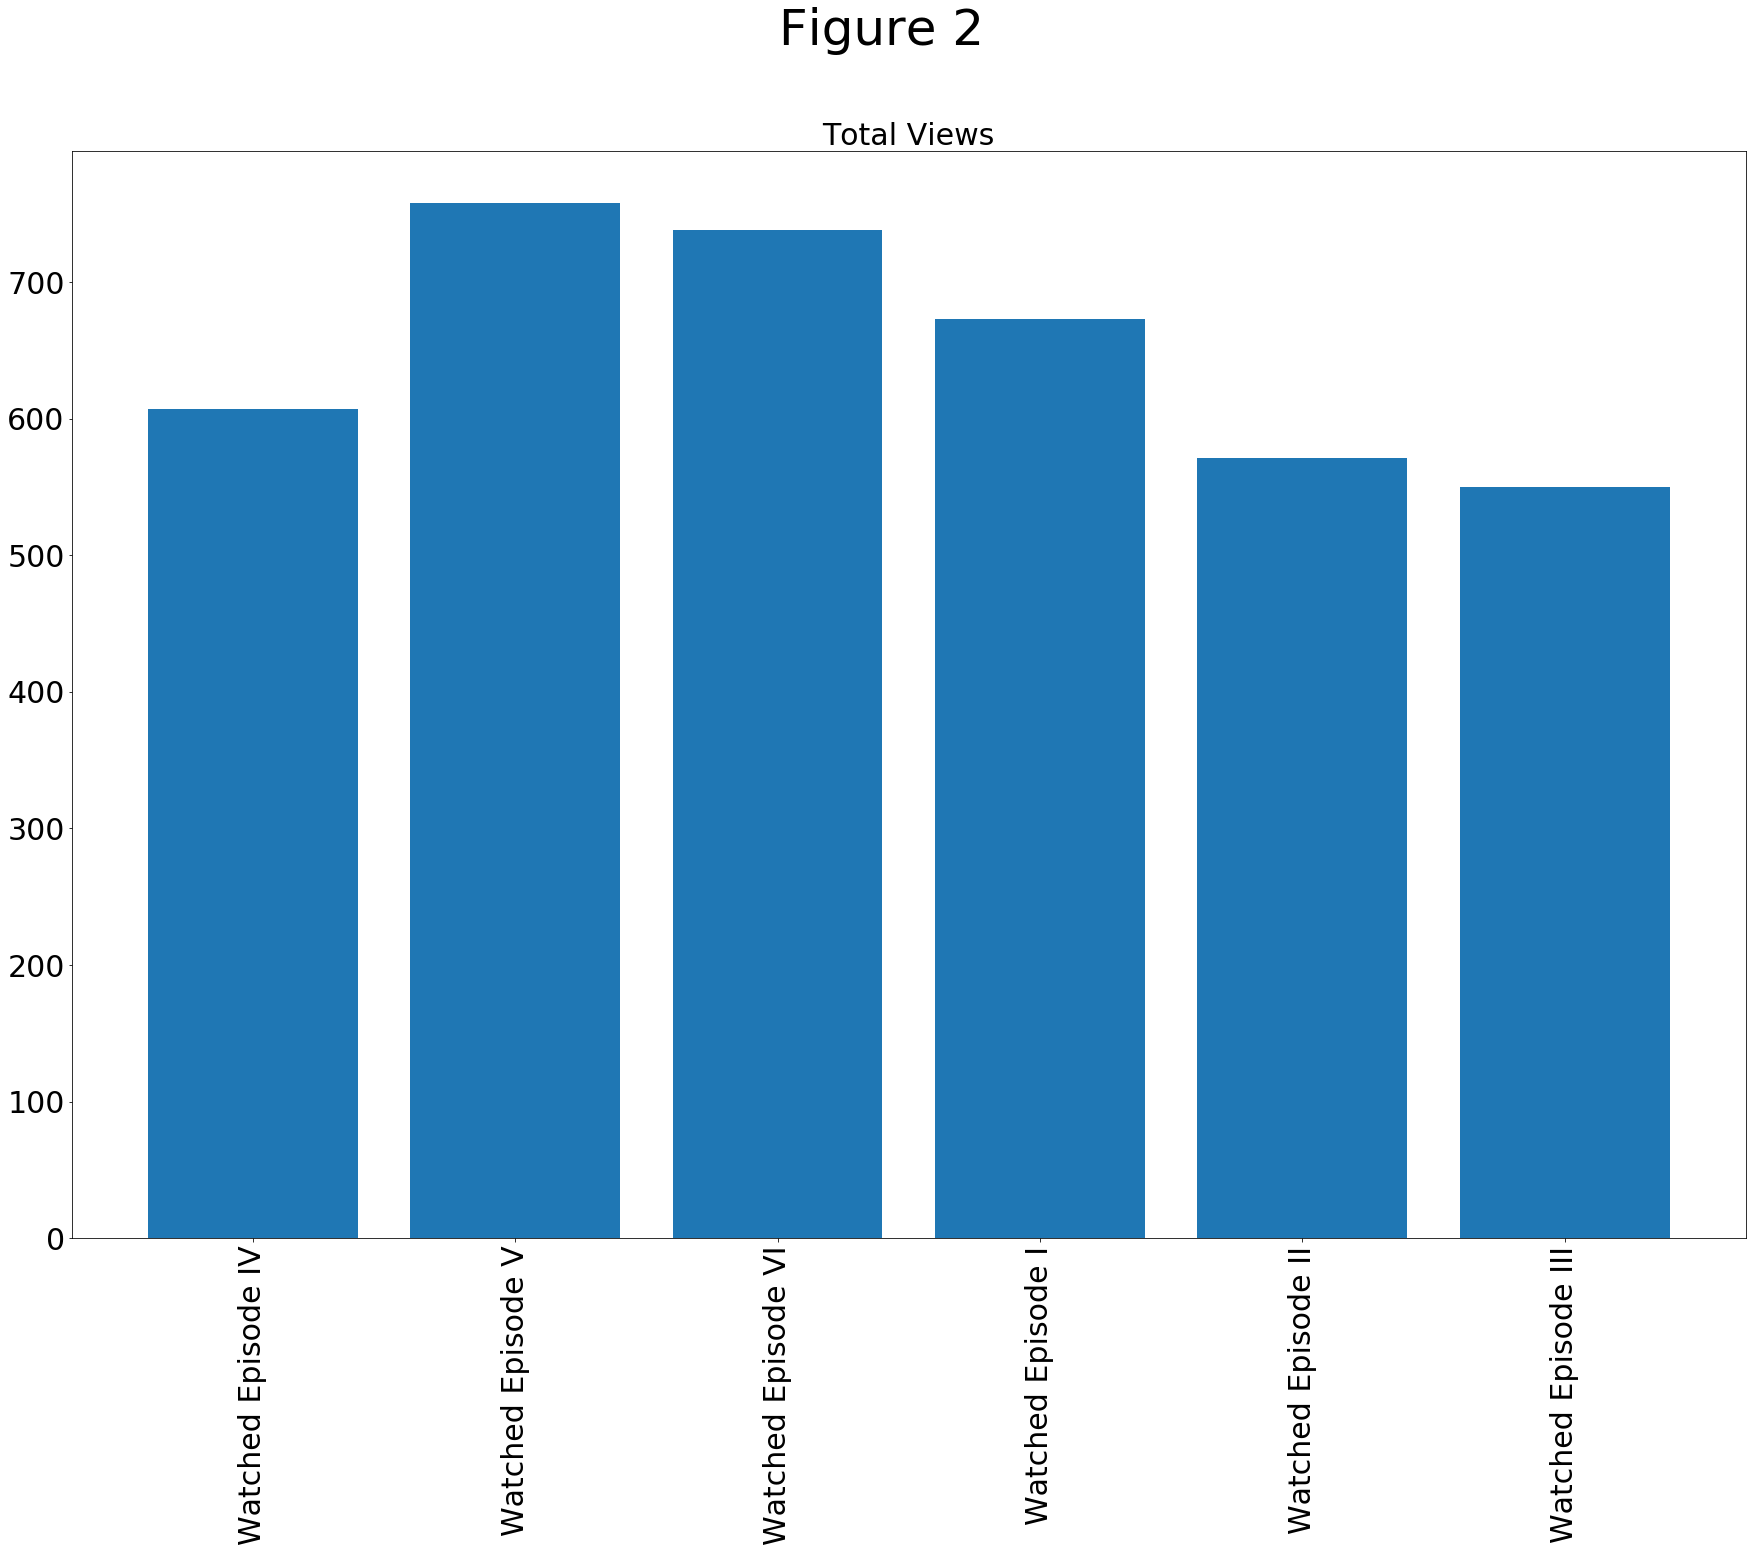

In [10]:
%matplotlib inline
freq_data = survey[[survey.columns[index] for index in [6,7,8,3,4,5]]].sum()
fig,ax = plt.subplots(figsize = (30,20))
ax.bar(bar_position,freq_data)
ax.set_title('Total Views', size = 30)
ax.set_xticks(bar_position)
ax.set_xticklabels(freq_data.index, rotation = 90)
for tick in (ax.xaxis.get_major_ticks() + ax.yaxis.get_major_ticks()):
    tick.label.set_fontsize(30)
fig.suptitle('Figure 2', fontsize = 50, y = 0.98 )
plt.show()

# Observations

- In the barchart above the data has been plotted according to the time line of movie releases, from 
  this it can be seen that from the first release of the series it started out slow; then after it       peaked quickly on the second release and then slowly it started to decline afterwards.
  <br><br>
- The reason for this trend is probably due to massively successful marketing in the early stages, both 
  commercially and through word of mouth. After the second release it dropped off slightly but           mantained about the same level, drastic drop in views afterwards is likely due to the huge time lapse   and the multiple changes made. This has probably led to a generational shift in preference with the     first three getting more views amongst the older generation, and the last three faring better amongst   the younger generation.



# Plot data by gender

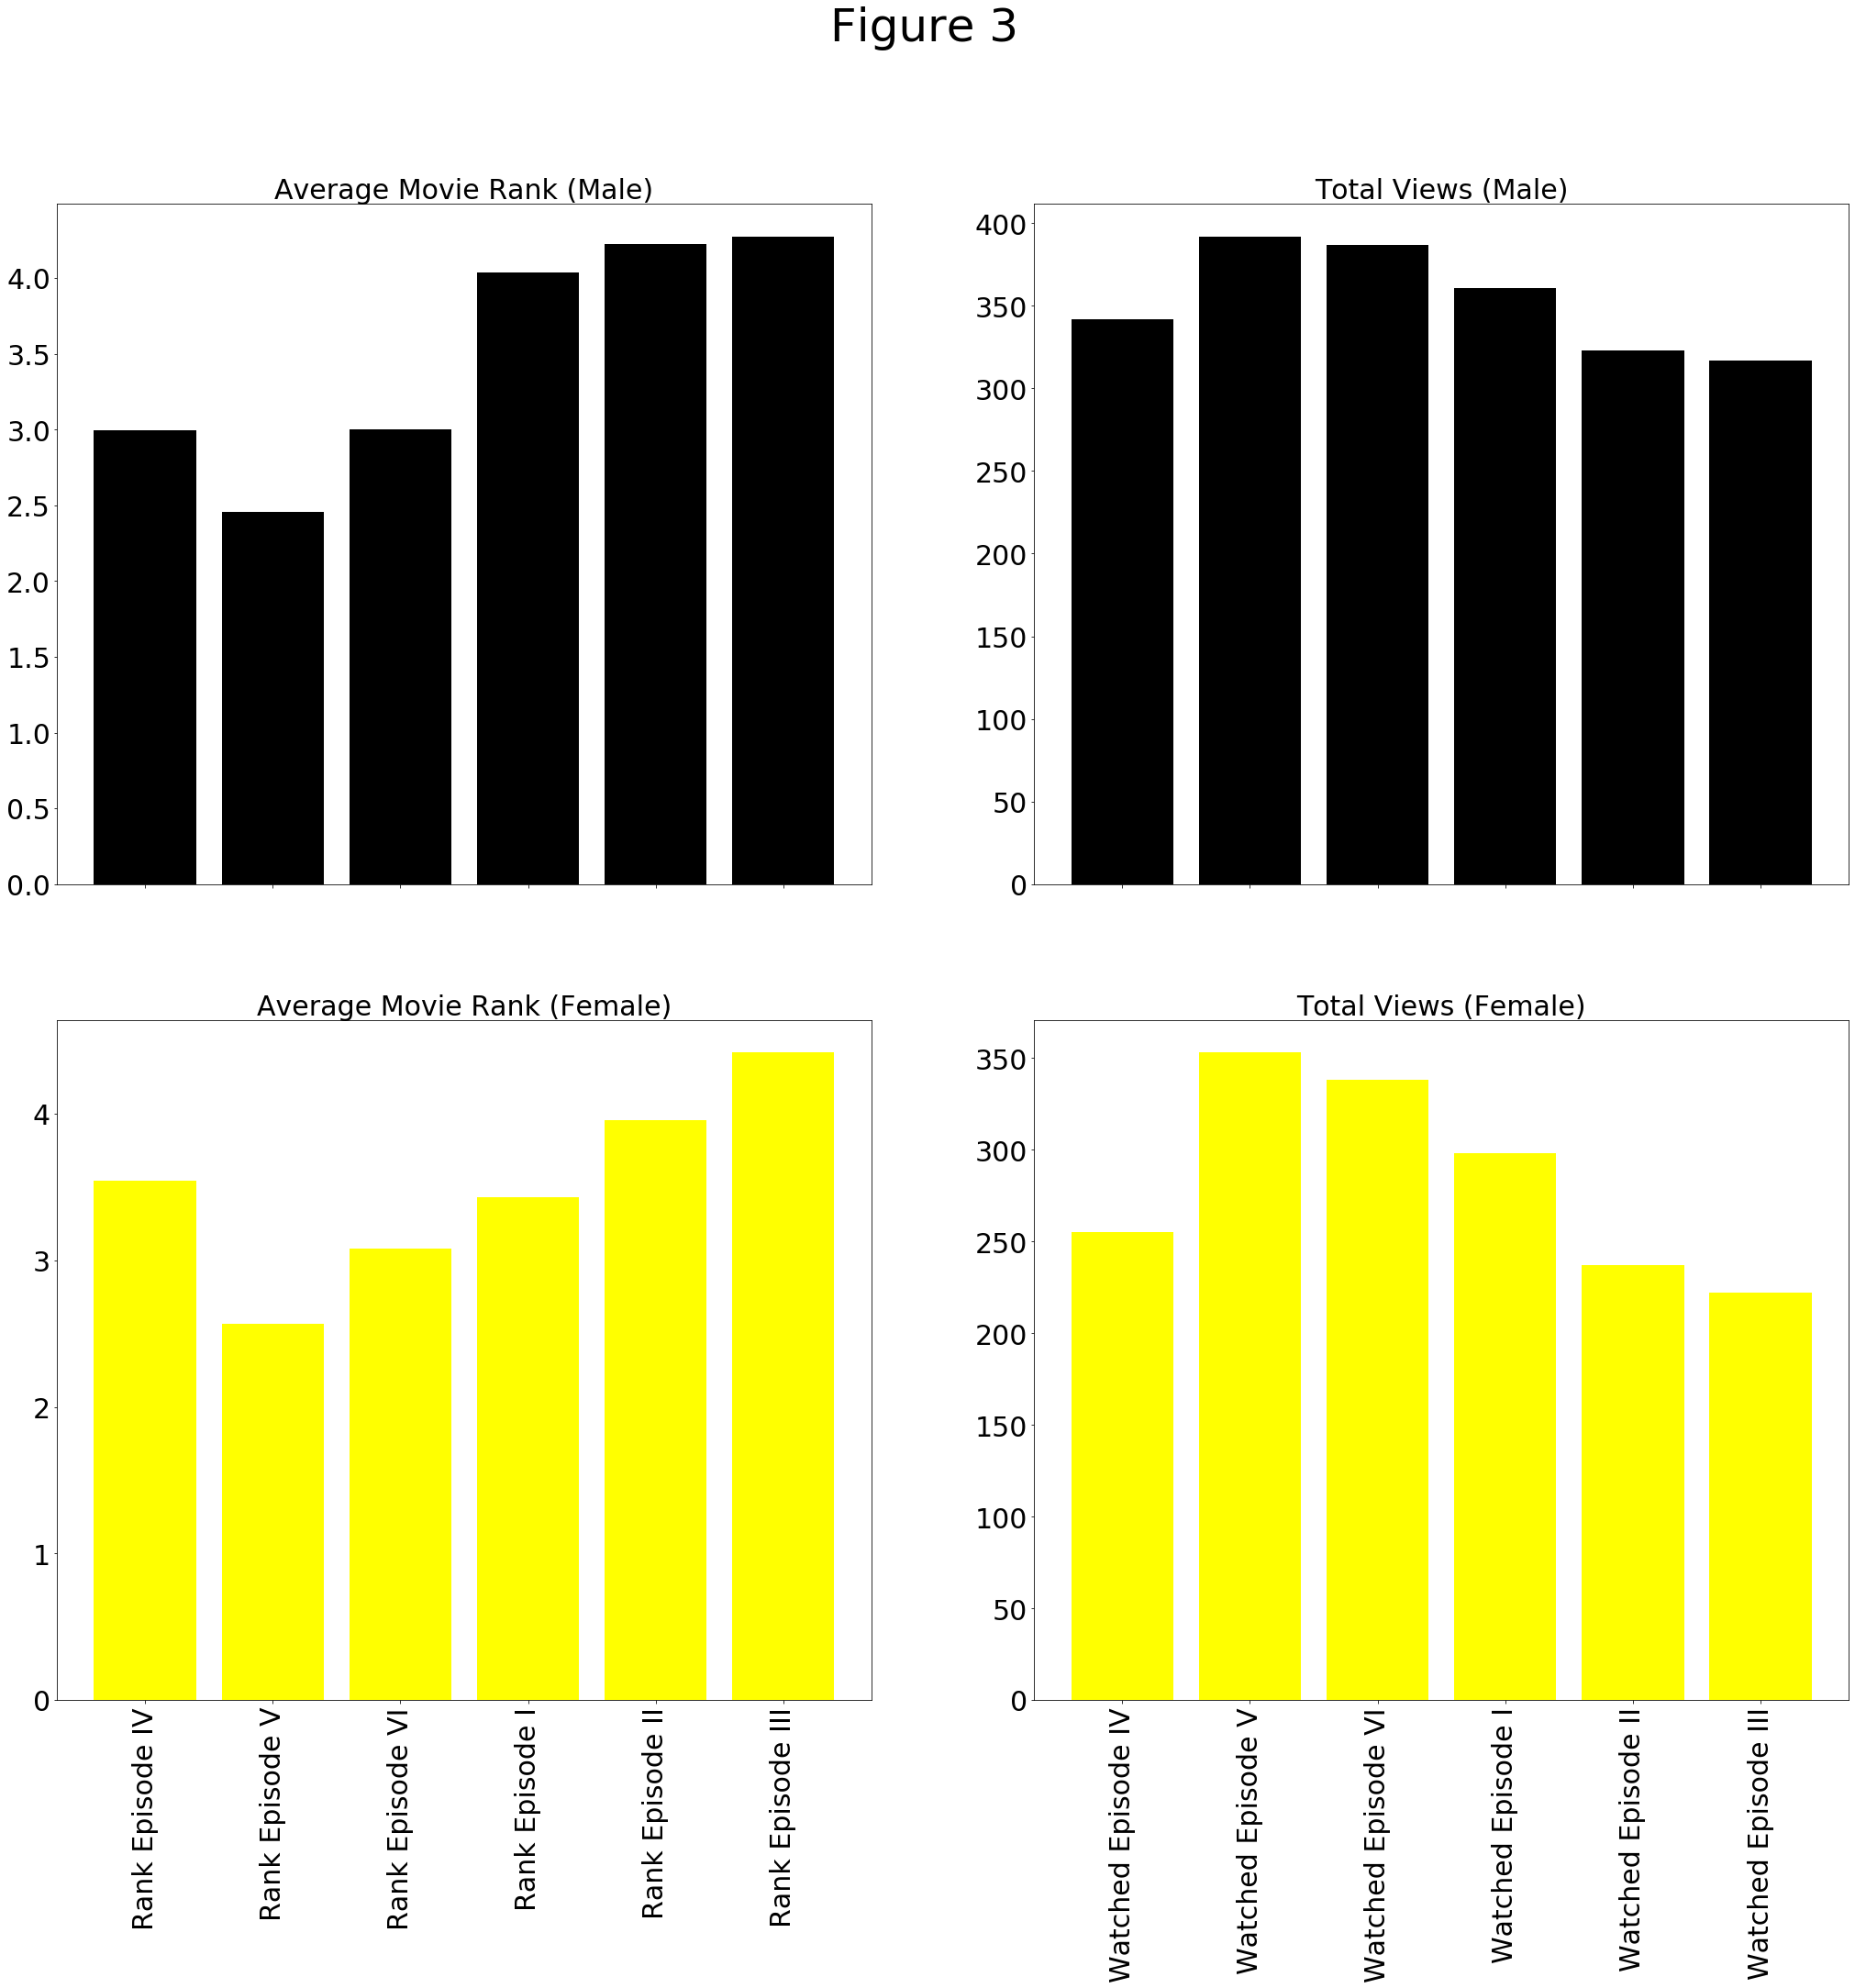

In [11]:
%matplotlib inline
fig,axes = plt.subplots(2,2, figsize = (35,30), sharex = 'col')
male_data = survey.loc[survey['Gender'] == 'Male']
female_data = survey.loc[survey['Gender'] == 'Female']
male_rank = male_data[[survey.columns[index] for index in [12,13,14,9,10,11]]].mean()
male_freq = male_data[[survey.columns[index] for index in [6,7,8,3,4,5]]].sum()
female_rank = female_data[[survey.columns[index] for index in [12,13,14,9,10,11]]].mean()
female_freq = female_data[[survey.columns[index] for index in [6,7,8,3,4,5]]].sum()
gender_dict = {0 : (male_rank,male_freq), 1: (female_rank,female_freq)}
titles = [['Average Movie Rank (Male)', 'Total Views (Male)'], \
          ['Average Movie Rank (Female)', 'Total Views (Female)']]
color_map = {0:'black', 1:'yellow'}

for row in range(2):
    data = gender_dict[row]
    title = titles[row]
    for column  in range(2):
        ax = axes[row,column]
        ax.bar(bar_position,data[column], color = color_map[row])
        ax.set_title(title[column], size = 30)
        ax.set_xticks(bar_position)
        ax.set_xticklabels(data[column].index, rotation = 90)
        for tick in (ax.xaxis.get_major_ticks() + ax.yaxis.get_major_ticks()):
            tick.label.set_fontsize(30)

fig.suptitle('Figure 3', fontsize = 50, y = 0.98 )
plt.show()

# Observations
<br><br>
- The trends for movie ranks and total views follow the same trajectory for both genders, however there
  are differences in rate of change for both genders. With the male gender changing their total views     from one movie to the next at a slower rate than Females 
<br><br>
- There seems to be a positive correlation between average movie ranks and total views for both           genders.
<br><br>
- Overall both genders are pointing to the second movie released as the most liked and watched in the 
  series, and the sixth movie released as the least liked and least watched in the series.
<br><br>
Following that train of thought let's find out who is the most liked, least liked and neither liked nor
not liked character according to the survey

In [12]:
# change some values in character columns that are too long
change_dict = {'Neither favorably nor unfavorably (neutral)':'neutral',\
               'Unfamiliar (N/A)': 'Unfamiliar', 'Very favorably': 'Love', \
               'Somewhat favorably': 'Like', 'Somewhat unfavorably':'Dislike', \
              'Very unfavorably': 'Hate'}

for column in range(15,29):
    survey[survey.columns[column]] = survey[survey.columns[column]].apply\
                                            (lambda x: change_dict.get(x,x))
    

# Plot Character Columns

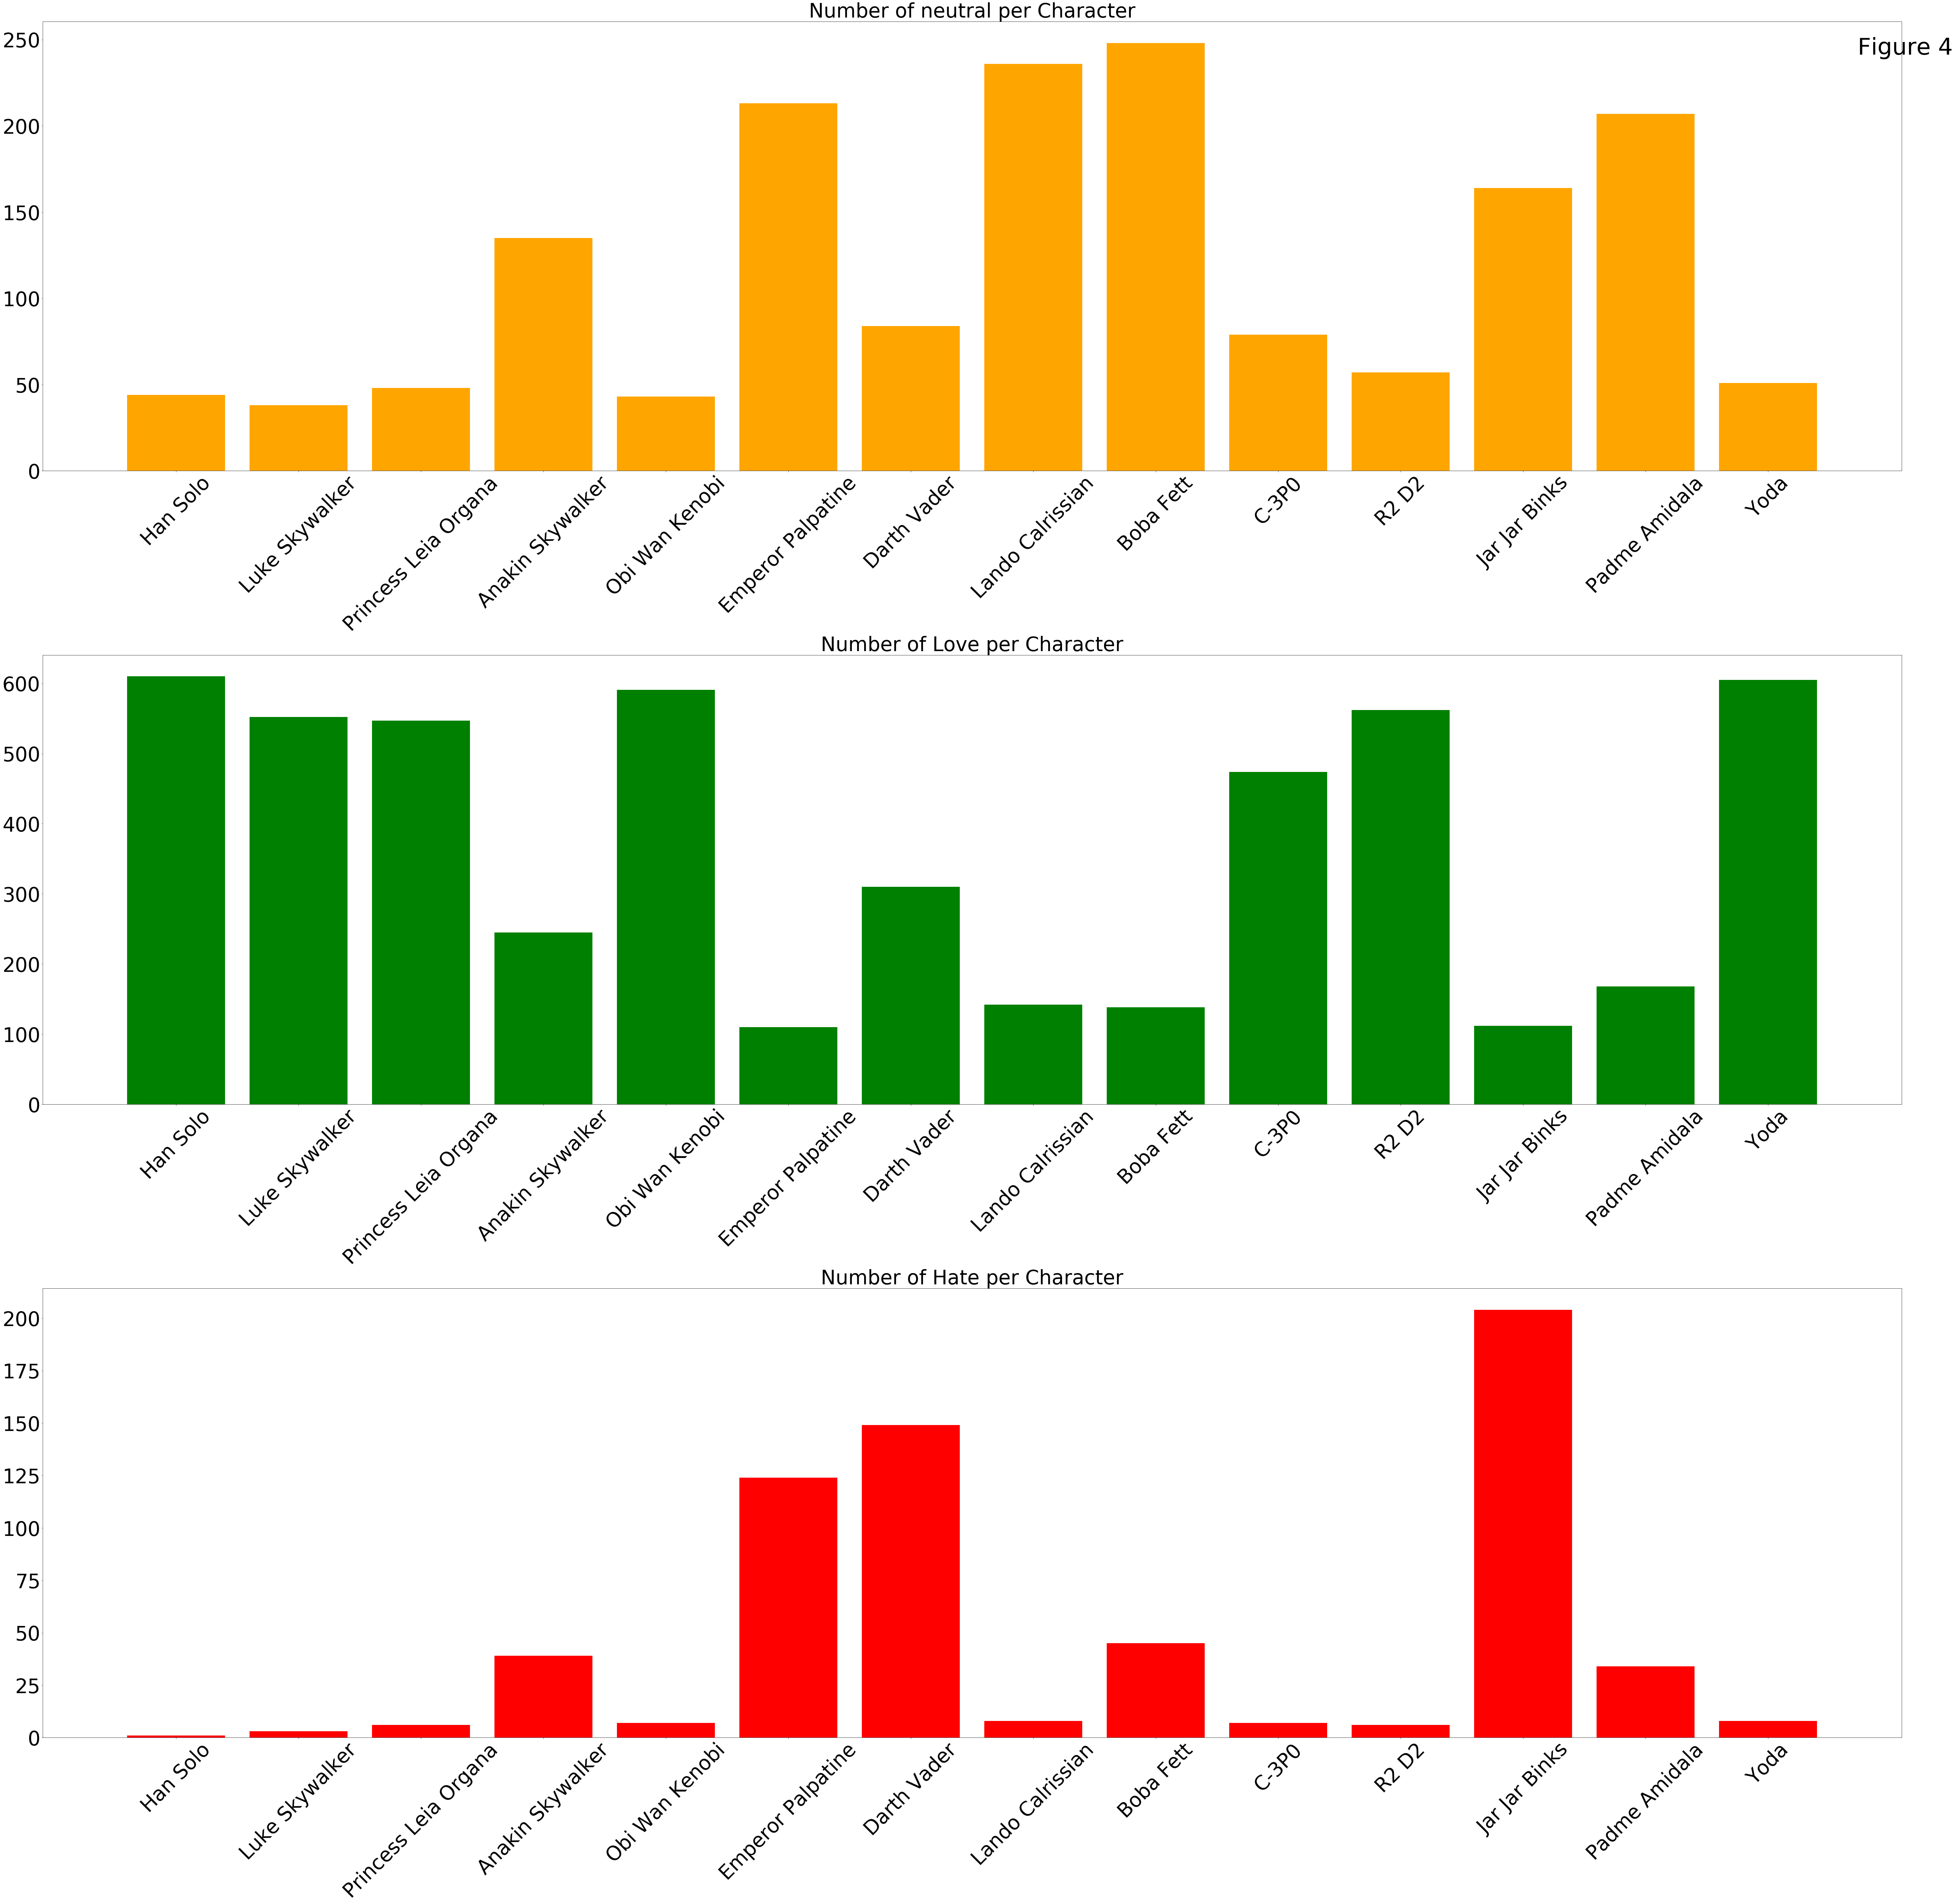

In [13]:
%matplotlib inline
fig,axes = plt.subplots(3,figsize = (80,80))
columns = [survey.columns[column] for column in range(15,29)]
color_map = {'neutral':'orange', 'Love': 'green', 'Hate': 'red'}
labels = list(color_map.keys())
for label in range(3):
    ax = axes[label]
    tag = labels[label]
    mask = survey[columns] != tag
    data = survey[columns].mask(mask,None)
    data = data.count()
    bar_position = np.arange(len(data)) + 0.75
    ax.bar(bar_position,data, color = color_map[tag])
    ax.set_title(f'Number of {tag} per Character', size = 60)
    ax.set_xticks(bar_position)
    ax.set_xticklabels(data.index, rotation = 45)
    for tick in (ax.xaxis.get_major_ticks() + ax.yaxis.get_major_ticks()):
        tick.label.set_fontsize(60)
        
fig.tight_layout(h_pad = 0.2)
fig.suptitle('Figure 4', fontsize = 70, x = 1, y = 0.98 )
plt.show()

# Observations
<br><br>
- Jar Jar Binks is the most disliked in the survey, which is not suprising considering that according 
  to his wikipedia <a href = https://en.wikipedia.org/wiki/Jar_Jar_Binks> profile </a> he was the most   hated character in all the movies series. This could partially explain the sharp jump in average rank   from Episode VI to Episode I seen in <b> Figure 1 </b>, since his first appearance was in Episode I
<br><br> 
- <a href = https://en.wikipedia.org/wiki/Han_Solo> Han Solo </a> is the most loved character in the     survey, followed closely by Yoda and Obi-Wan Kenobi. This would partially explain the trends in <b>     Figure 1 </b> and <b> Figure 2 </b>, since Han Solo wasn't in any of the last three movies, and as     well although  <a href = https://en.wikipedia.org/wiki/Obi-Wan_Kenobi> Obi-Wan Kenobi </a> and 
  <a href = https://en.wikipedia.org/wiki/Yoda> Yoda </a> were in the last three, they didn't             necessarily have central roles in the movies.
<br><br> 
- People seem to feel the most neutral about Bobba Fett
<br><br>

Now to see if there is indeed a generational gap between the first three and last three movies

# Plot movie views by age

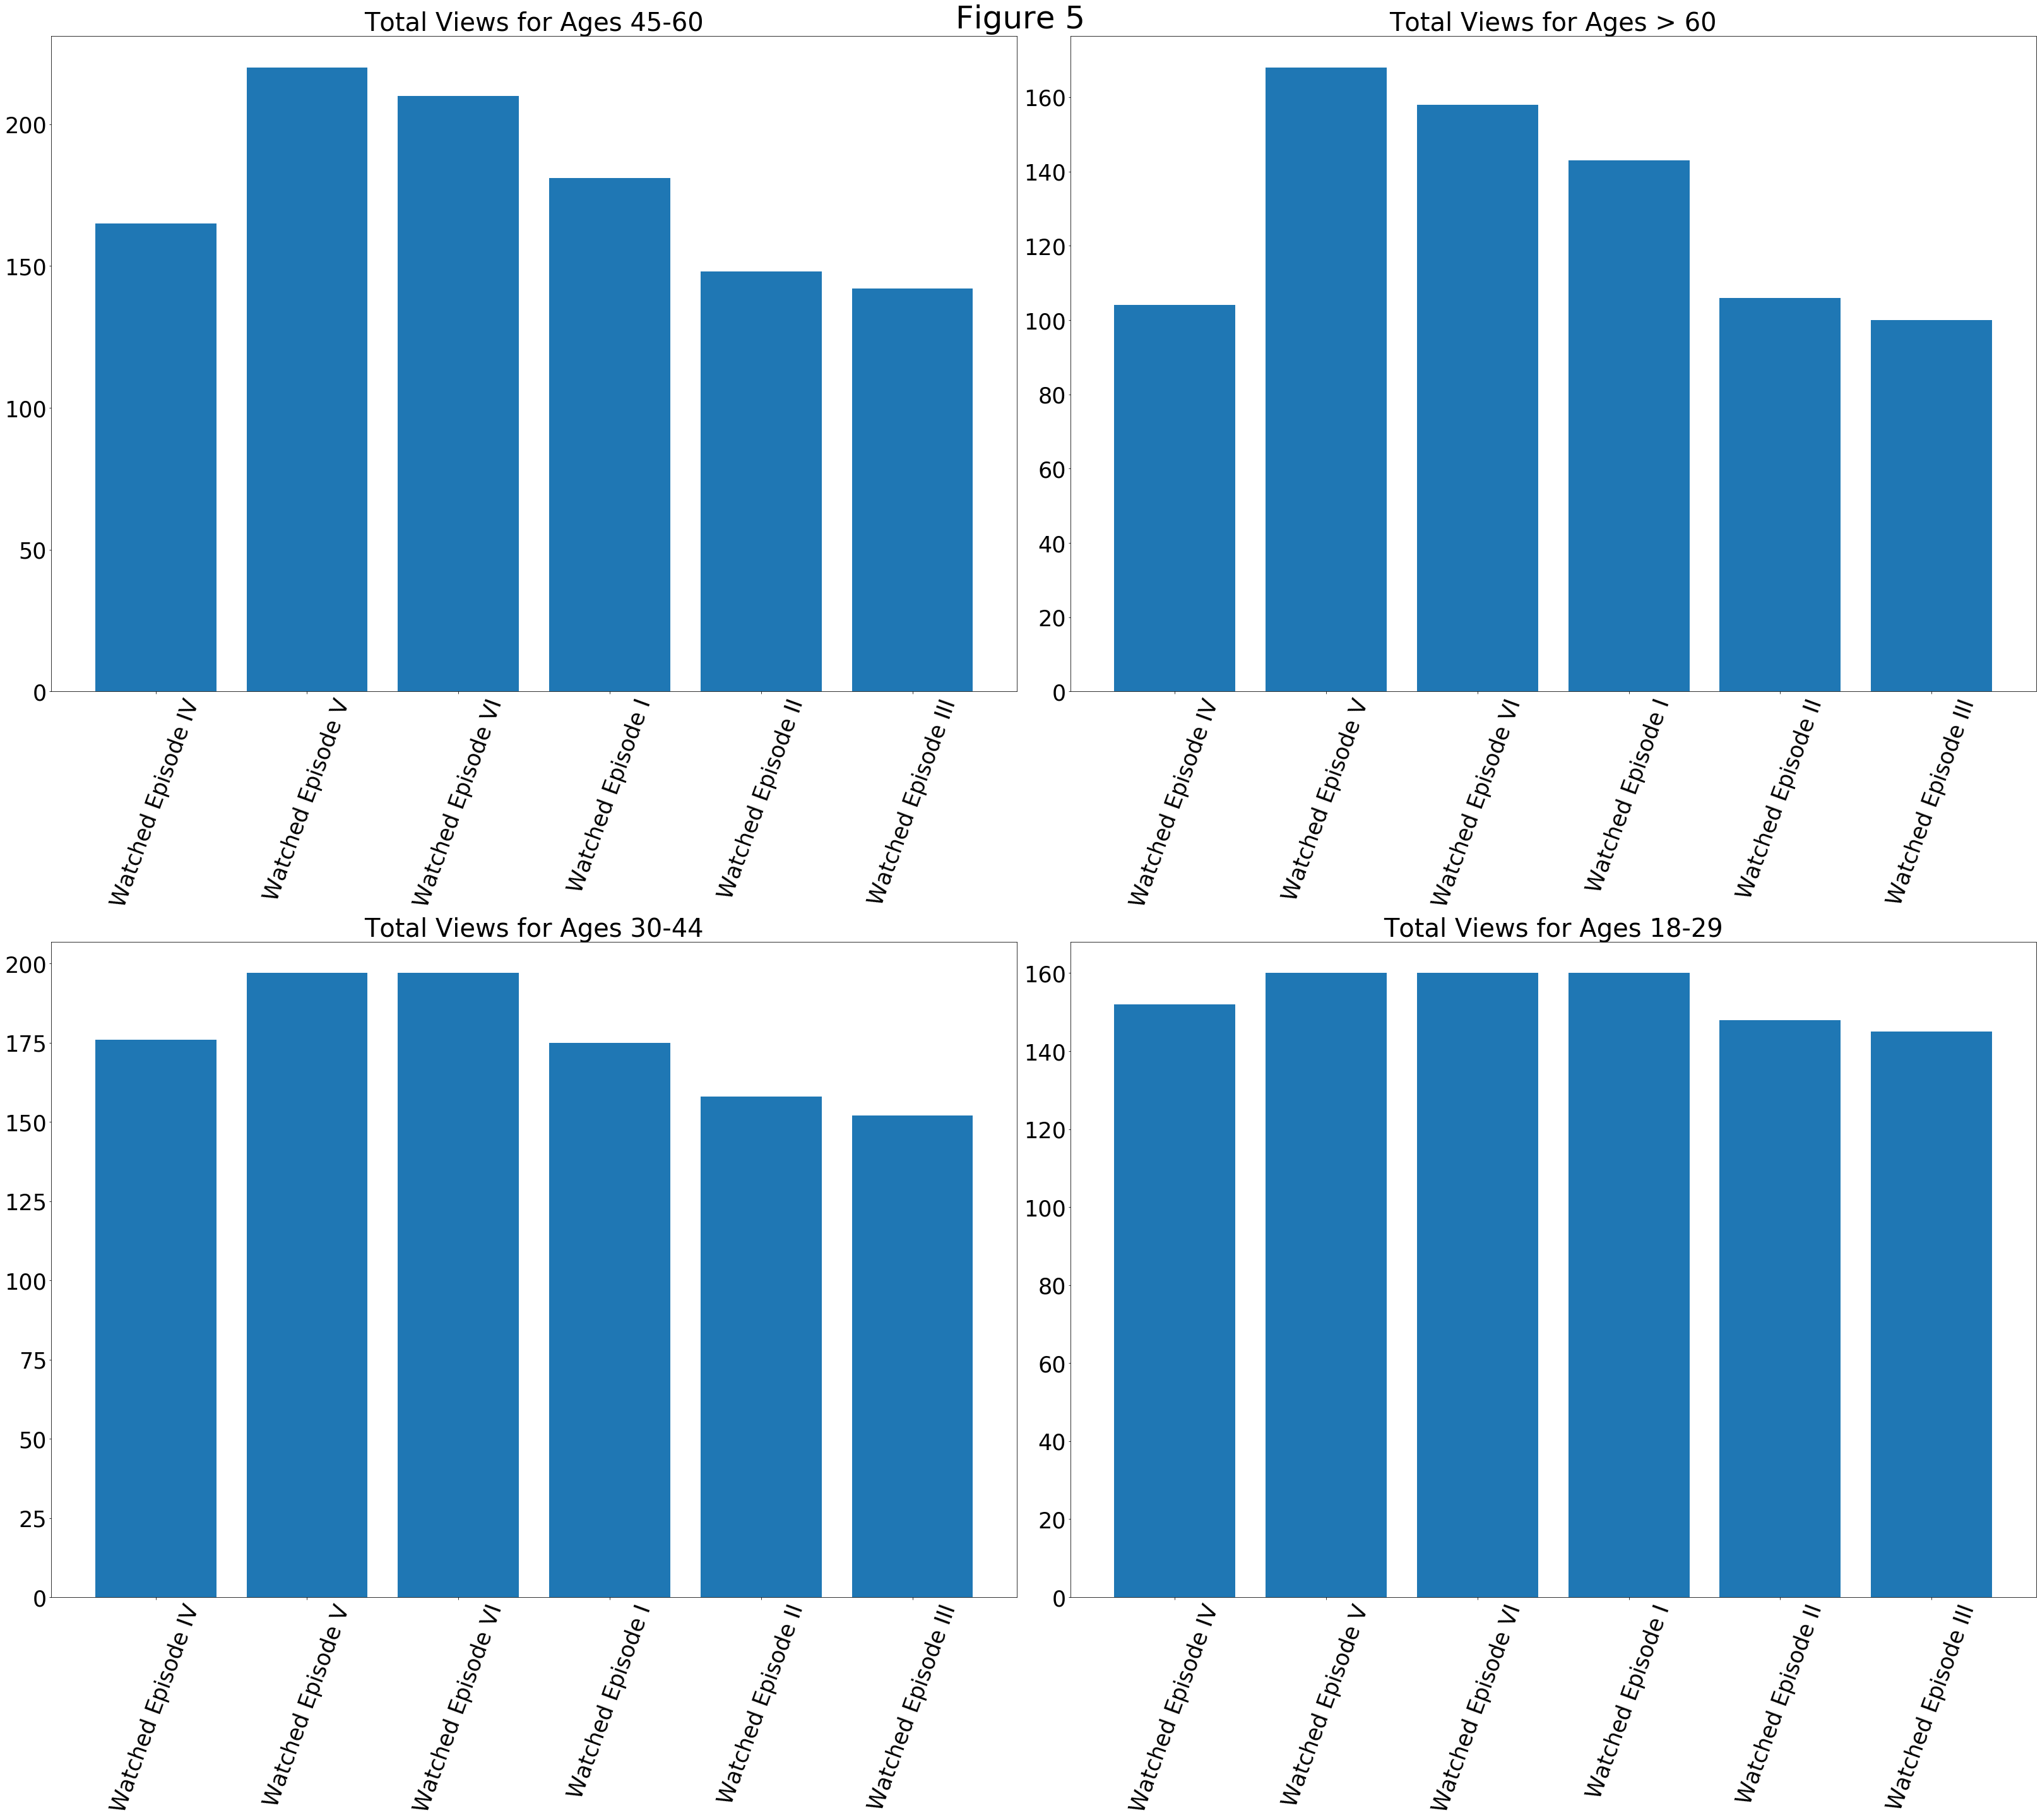

In [14]:
%matplotlib inline
ages = list(survey["Age"].value_counts().index)
freq_data = survey[[survey.columns[index] for index in [6,7,8,3,4,5]]]
fig,axes = plt.subplots(2,2,figsize = (45,40))
count = 0 # keep track of ages
for row in range(2):
    for column in range(2):
        age = ages[count]
        data = freq_data.loc[survey['Age'] == age].sum()
        ax = axes[row,column]
        bar_position = np.arange(len(data))
        ax.bar(bar_position,data)
        ax.set_title(f'Total Views for Ages {age}', size = 40)
        ax.set_xticks(bar_position)
        ax.set_xticklabels(data.index, rotation = 70)
        for tick in (ax.xaxis.get_major_ticks() + ax.yaxis.get_major_ticks()):
            tick.label.set_fontsize(35)
        count += 1

fig.suptitle('Figure 5', fontsize = 50, y = 1 )
fig.tight_layout()
plt.show()

# Observations
<br><br>
- It seems that ages 45 and above are largely responsible for the shifts we see in movie views from       Episode IV to Episode V.
<br><br>
- Surprisingly there isn't a lot of variation in views from Episode IV to Episode III in 18-29 year       olds,this could be attribued to the medium used to watch the movies, given that this data was 
  collected in 2014 and the first movie was released in 1977 they would've had to watch the movies
  mostly on DVD or by streaming online.
 <br><br>
- Overall there is a split between those under 45 and those above 45 in views, with those under 45 more 
  likely to have watched the last three releases than the first three.
 <br><br>
Next the movie ranks will be plotted by age to see if it also indicates a generational shift

# Plot average rank by age

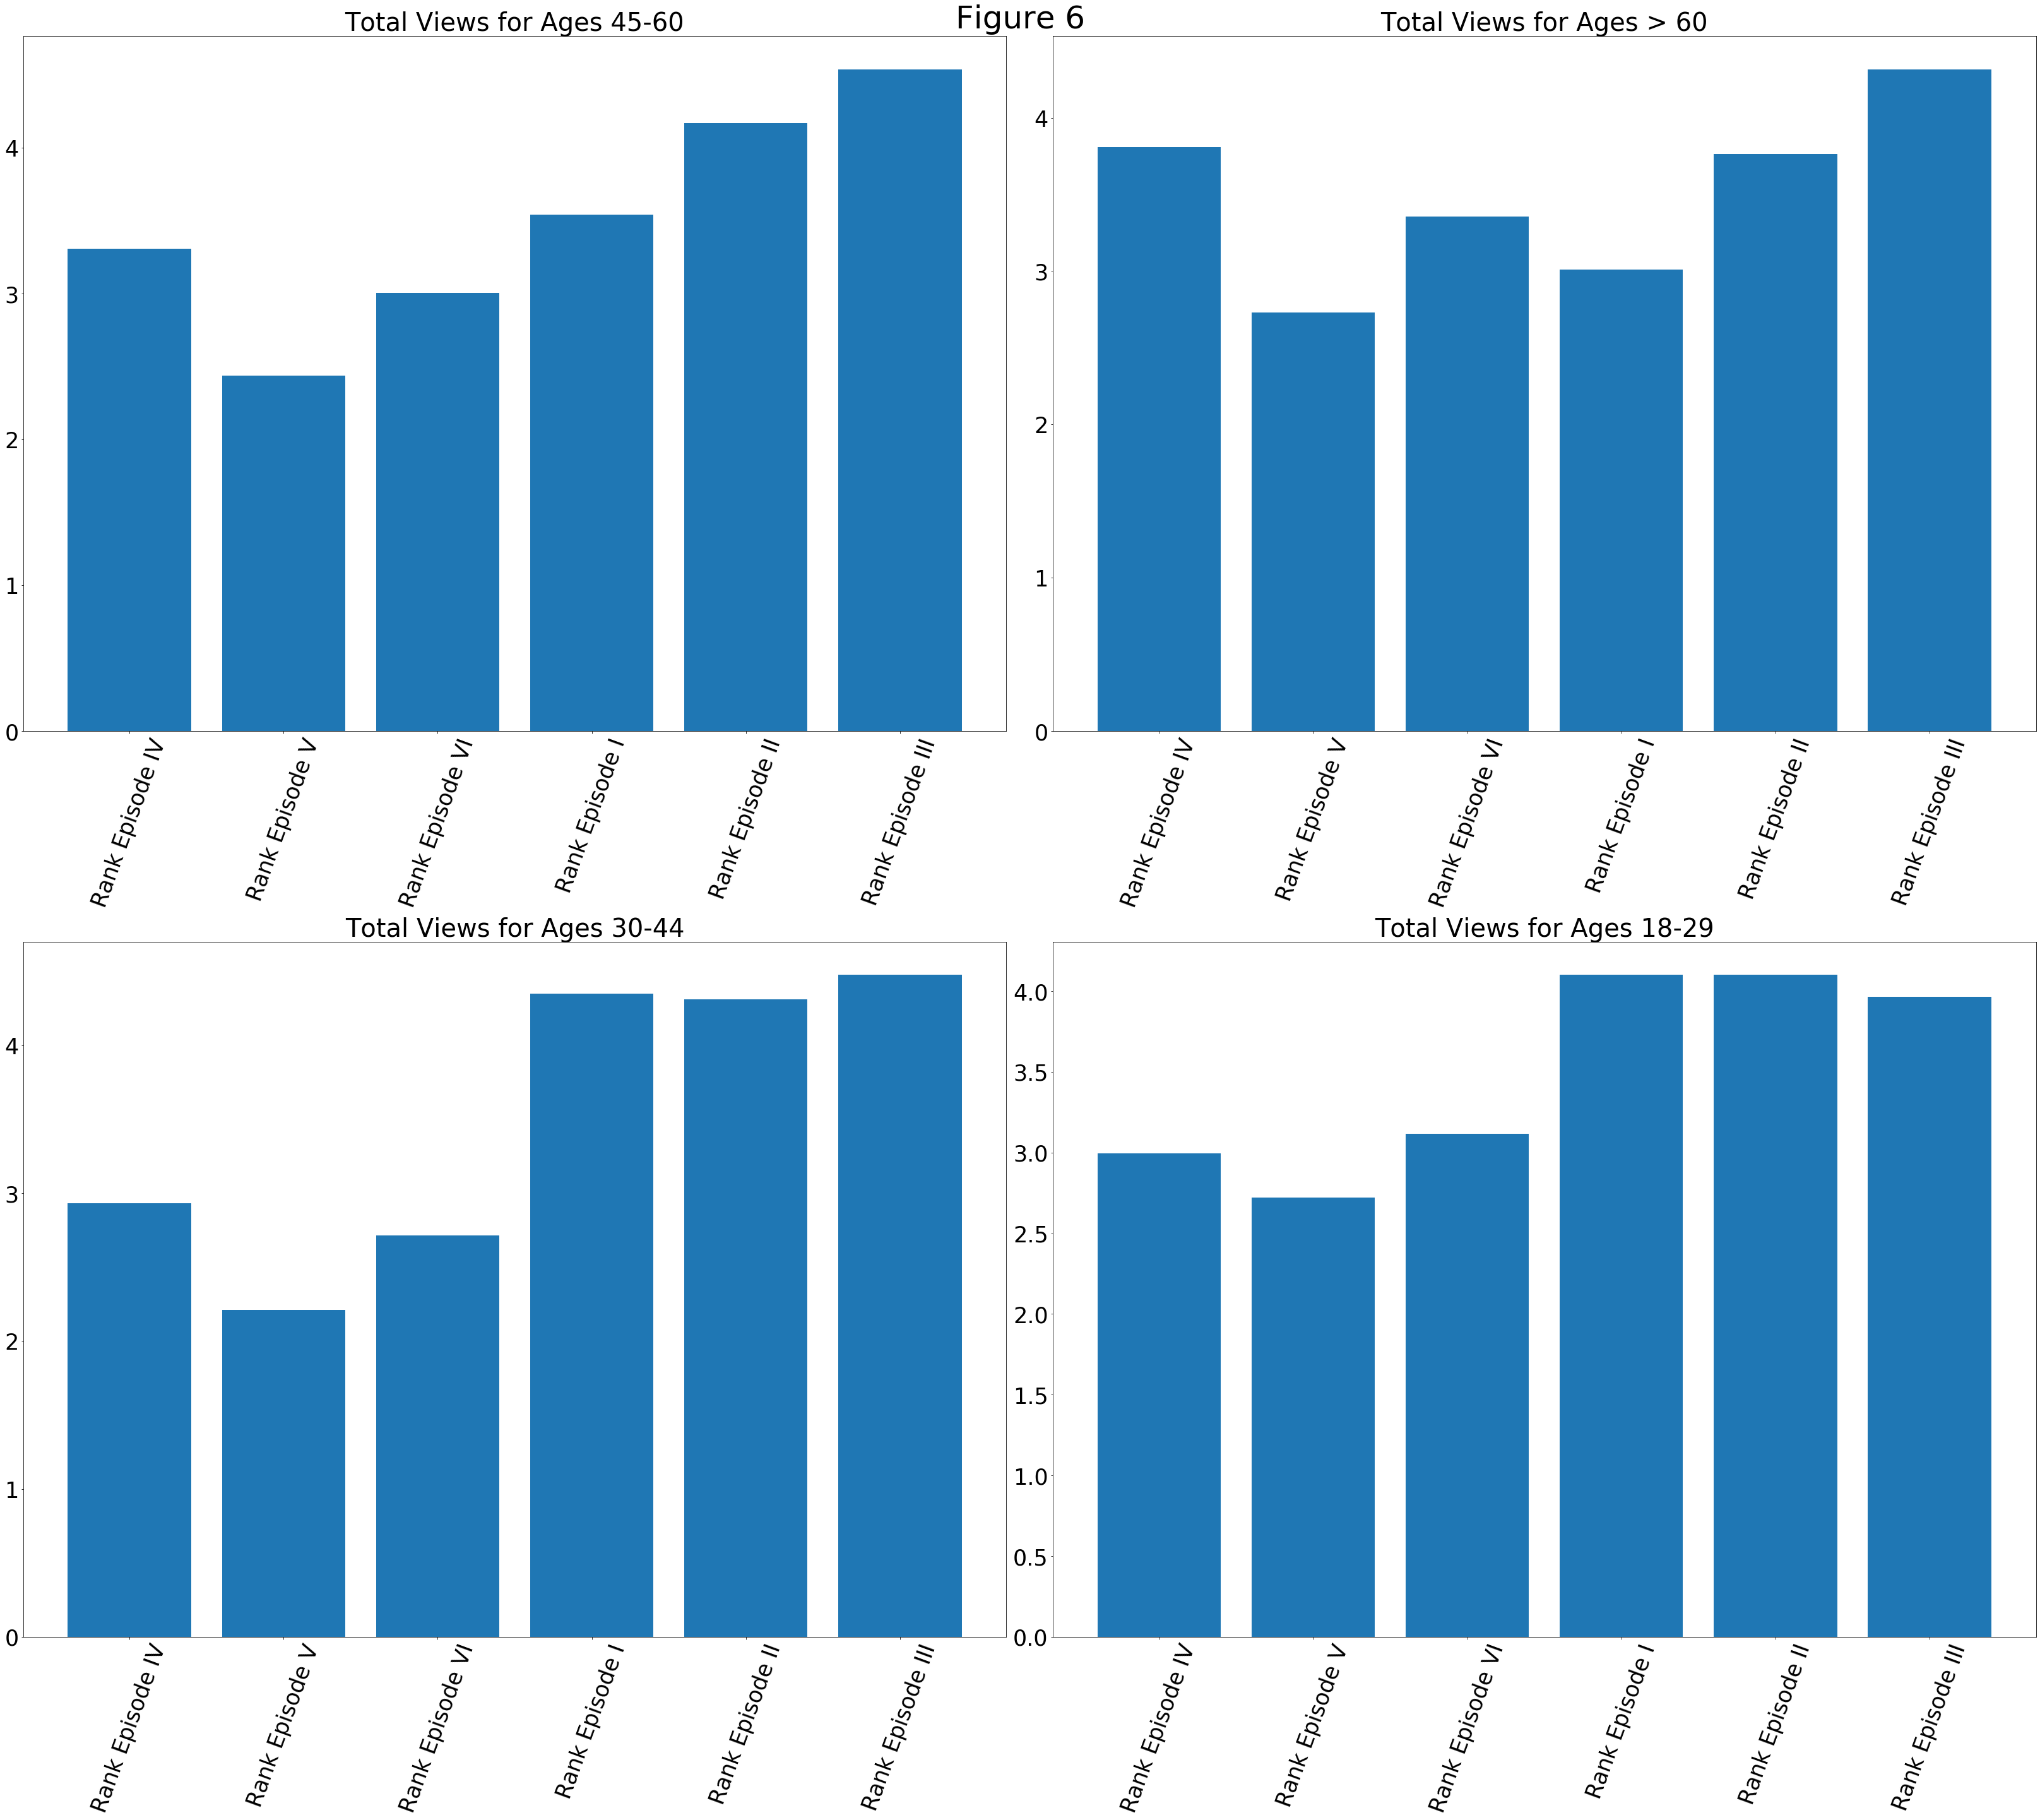

In [15]:
%matplotlib inline
ages = list(survey["Age"].value_counts().index)
freq_data = survey[[survey.columns[index] for index in [12,13,14,9,10,11]]]
fig,axes = plt.subplots(2,2,figsize = (45,40))
count = 0 # keep track of ages
for row in range(2):
    for column in range(2):
        age = ages[count]
        data = freq_data.loc[survey['Age'] == age].mean()
        ax = axes[row,column]
        bar_position = np.arange(len(data))
        ax.bar(bar_position,data)
        ax.set_title(f'Total Views for Ages {age}', size = 40)
        ax.set_xticks(bar_position)
        ax.set_xticklabels(data.index, rotation = 70)
        for tick in (ax.xaxis.get_major_ticks() + ax.yaxis.get_major_ticks()):
            tick.label.set_fontsize(35)
        count += 1

fig.suptitle('Figure 6', fontsize = 50, y = 1 )
fig.tight_layout()
plt.show()

# Observations
<br><br>

- Surprisingly the people over 60 are the only age group to have enjoyed Episode I and have it ranked
  second in the movie releases, which is odd considering amongst al age groups they were bottom in
  total views for the episode.
<br><br>
- People over 60 were far more generous in their ranking of the movies compared to other age groups.
<br><br>
- The generational shift according to the ranking shows that those over 45 are more likely to give a
  good rating to the movies than those under 45.
  

# Conclusion

      The first three releases are consistently the most loved amongst the strata of age and gender analysed in this project, with the second release unanimously considered the best movie released.
      I would like to further analyse the strata of Star Trek fans, location and income, to see if there is any different outcome from the ones seen so far